In [18]:
## Import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


In [19]:
## Load dataset.
## It's already splitted and cleaned as
'''
pre_covid = merged.loc[merged['ev_year'] < 2020]
post_covid = merged.loc[merged['ev_year'] >= 2020]
pre_covid = pre_covid.reset_index().drop(columns=['index'])

strat_kfold = StratifiedGroupKFold(n_splits = 5, shuffle=True, random_state=412)  # Validation and test will both be 20% of data, hence 5 splits
splits = strat_kfold.split(pre_covid, pre_covid['damage'], pre_covid['ev_id'].astype(str))   # Grouped by 'ev_id', stratified by 'damage'

# data_test <-- test set from the first fold (20% of data)
# data_test <-- test set from the second fold (20% of data)
# data_train <- remaining data (60%)

for i, (train_index, test_index) in enumerate(splits):
    if i==0:
        data_test = pre_covid.iloc[test_index]
        data_train = pre_covid.iloc[train_index]
    elif i==1:
        data_val = pre_covid.iloc[test_index]
        data_train.drop(test_index)
        break

'''

## Randomly sampled, stratified along with the 'damage'
## Train : Val : Test = 6:2:2 (Precovid)


df_train = pd.read_csv('../data/ntsb_processed/ntsb_train_cleaned.csv')
df_val = pd.read_csv('../data/ntsb_processed/ntsb_val_cleaned.csv')
# df_test = pd.read_csv('../data/ntsb_processed/master_test.csv')
# df_post_covid = pd.read_csv('../data/ntsb_processed/master_post_covid.csv')


In [3]:
def show_difference_between_two_df(df1 : pd.DataFrame, df2: pd.DataFrame):
    list1 = df1.columns  # Your first list
    list2 = df2.columns # Your second list

    # Convert to Python sets
    set1 = set(list1)
    set2 = set(list2)

    # Find what's in list1 but not in list2
    only_in_list1 = set1 - set2

    # Find what's in list2 but not in list1
    only_in_list2 = set2 - set1

    print("Only in the first dataframe:", sorted(only_in_list1))
    print("Only in the second dataframe:", sorted(only_in_list2))

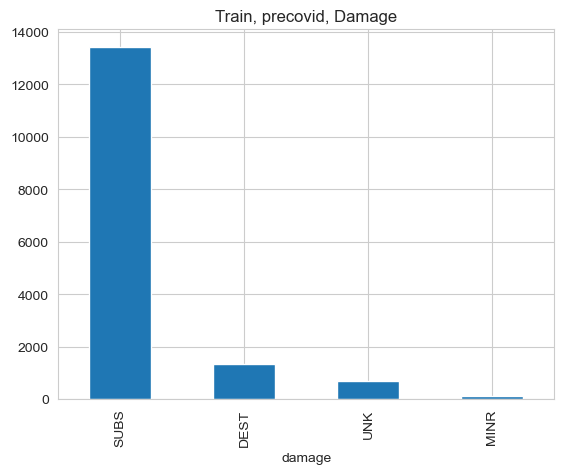

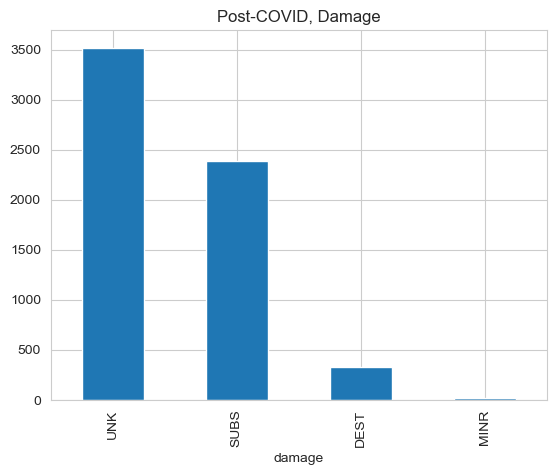

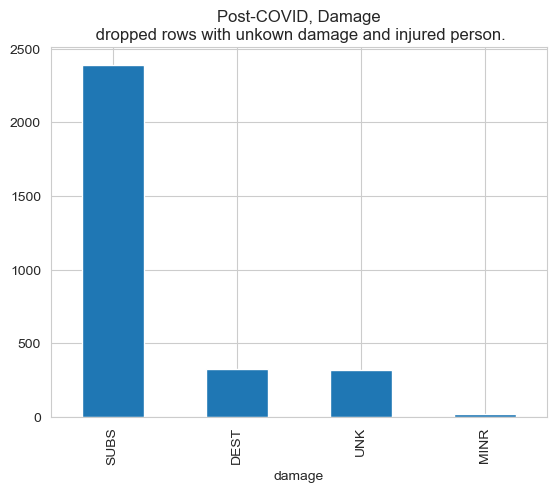

In [4]:
'''
# First plot
df_train['damage'].value_counts().plot(kind='bar')
plt.title('Train, precovid, Damage')
plt.show()  

# Second plot
df_post_covid['damage'].value_counts().plot(kind='bar')
plt.title('Post-COVID, Damage')
plt.show()

# Third plot
condition = (df_post_covid['damage'] == 'UNK') & (df_post_covid['acft_injured_person_count'].isna())
df_post_covid = df_post_covid.loc[~condition]
df_post_covid['damage'].value_counts().plot(kind='bar')
plt.title('Post-COVID, Damage\n dropped rows with unkown damage and injured person.')
plt.show()
'''

In [5]:
df_train['latitude']

0        381326N
1        381326N
2        293022N
3        035321N
4        040276N
          ...   
15533    301055N
15534    335352N
15535    401819N
15536    333840N
15537    031945N
Name: latitude, Length: 15538, dtype: object

In [8]:
# change latitude and longitude to numeric value

for name, dataset in zip(['df_train', 'df_val'], [df_train, df_val]):
    df = dataset.copy()  

    for col in ['latitude', 'longitude']:
        df[col] = df[col].replace('other/unknown', np.nan)

    df.dropna(subset=['latitude', 'longitude'], inplace=True)

    df['latitude'] = df['latitude'].str[:-1].astype(int)
    df['longitude'] = df['longitude'].str[:-1].astype(int)

    if name == 'df_train':
        df_train = df
    else:
        df_val = df

In [22]:
features = ['latitude', 'longitude',    # need to change to numeric value first
       'apt_dist', 'gust_kts',
       'aircraft_count', 'num_eng', 'days_since_insp', 'light_cond_DAYL', 'light_cond_DUSK',
       'light_cond_NDRK', 'light_cond_NITE', 'light_cond_other/unknown',
       'BroadPhaseofFlight_Air', 'BroadPhaseofFlight_Ground',
       'BroadPhaseofFlight_Landing', 'BroadPhaseofFlight_Takeoff',
       'BroadPhaseofFlight_other/unknown', 'eng_type_REC', 'eng_type_TF',
       'eng_type_TP', 'eng_type_TS', 'eng_type_other/unknown', 'far_part_091',
       'far_part_121', 'far_part_135', 'far_part_137', 'far_part_PUBU',
       'far_part_other/unknown', 'acft_make_beech', 'acft_make_bell',
       'acft_make_boeing', 'acft_make_cessna', 'acft_make_mooney',
       'acft_make_other/unknown', 'acft_make_piper',
       'acft_make_robinson helicopter', 'acft_category_AIR',
       'acft_category_HELI', 'acft_category_other/unknown', 'homebuilt_N',
       'homebuilt_Y', 'fixed_retractable_FIXD',
       'fixed_retractable_RETR',
       'second_pilot_N', 'second_pilot_Y', 'second_pilot_other/unknown']

categorical_features = ['aircraft_count',
                     'light_cond_DAYL','light_cond_DUSK','light_cond_NDRK','light_cond_NITE','light_cond_other/unknown',
                     'BroadPhaseofFlight_Air','BroadPhaseofFlight_Ground','BroadPhaseofFlight_Landing','BroadPhaseofFlight_Takeoff','BroadPhaseofFlight_other/unknown',
                     'eng_type_REC','eng_type_TF','eng_type_TP','eng_type_TS','eng_type_other/unknown',
                     'far_part_091','far_part_121','far_part_135','far_part_137','far_part_PUBU','far_part_other/unknown',
                     'acft_make_beech','acft_make_bell','acft_make_boeing','acft_make_cessna','acft_make_mooney','acft_make_other/unknown','acft_make_piper',
                     'acft_make_robinson helicopter','acft_category_AIR','acft_category_HELI','acft_category_other/unknown',
                     'homebuilt_N','homebuilt_Y','homebuilt_other/unknown',
                     'fixed_retractable_FIXD','fixed_retractable_RETR','fixed_retractable_other/unknown',
                     'second_pilot_N','second_pilot_Y','second_pilot_other/unknown']

In [11]:
df_train = df_train[df_train['gust_kts']<800]

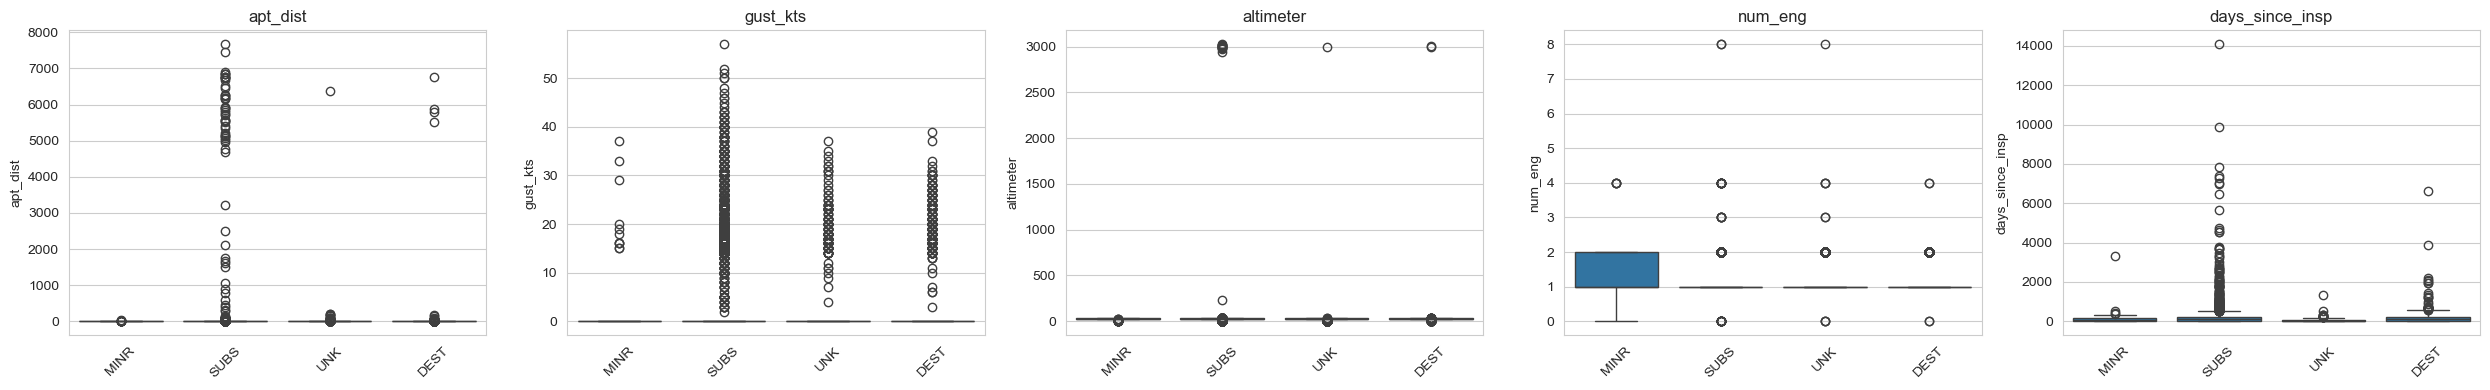

In [12]:
target = 'damage'
# List of numerical features
num_features = ['apt_dist', 'gust_kts', 'altimeter', 'num_eng','days_since_insp']



# Create a 1-row grid of box plots
fig, axes = plt.subplots(1, len(num_features), figsize=(5 * len(num_features), 4))

for i, feature in enumerate(num_features):
    sns.boxplot(data=df_train, x=target, y=feature, ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

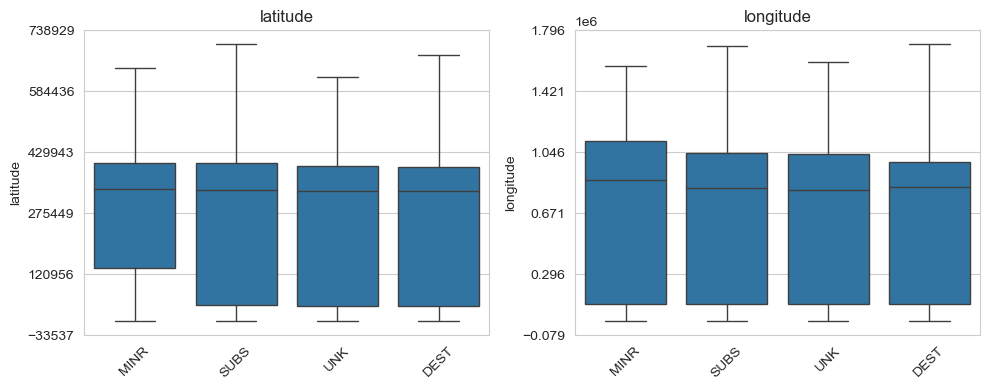

In [15]:
num_features =['latitude', 'longitude']


# Create a 1-row grid of box plots
fig, axes = plt.subplots(1, len(num_features), figsize=(5 * len(num_features), 4))

for i, feature in enumerate(num_features):
    sns.boxplot(data=df_train, x=target, y=feature, ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45)
    
    # Reduce number of yticks
    y_min, y_max = axes[i].get_ylim()
    axes[i].set_yticks(np.linspace(y_min, y_max, 6))  
plt.tight_layout()
plt.show()

In [16]:
num_features = ['apt_dist', 'gust_kts', 'altimeter', 'num_eng', 'days_since_insp', 'latitude', 'longitude']

In [17]:
## Function for showing histogram in categorical features per damage level.

def show_barplot(categorical_features : list[str], df : pd.DataFrame):
    damage_levels = ['DEST', 'SUBS', 'MINR', 'UNK']
    colors = {'DEST': 'red', 'MINR': 'skyblue', 'SUBS': 'blue', 'UNK': 'cyan'}

    
    
    for feature in categorical_features:
        _, axes = plt.subplots(1, 4, figsize=(5 * 4, 4), squeeze=False)

        for j, dmg in enumerate(damage_levels):
            ax = axes[0, j]
            ax.bar(df[df['damage']==dmg][feature].value_counts(normalize=True).keys(), 
                    df[df['damage']==dmg][feature].value_counts(normalize=True).values, 
                    color=colors[dmg])
            ax.set_title(f"{feature}\n{dmg}", fontsize=10)
            ax.set_ylim(0, 1)
            # ax.tick_params(axis='x', rotation=45)

        plt.tight_layout()
        plt.show()
        


# show_barplot([f for f in categorical_features if f.startswith('second')], 
#              df_train)

In [23]:

target = 'damage'
# Drop Unknown damage
df_train = df_train[df_train[target] != 'UNK']


# Extract features and target from the training DataFrame.
X_train = df_train[features]
y_train = df_train[target]


label_order = ['MINR', 'SUBS', 'DEST']
# label_map = {'MINR':0, 'SUBS' :0, 'DEST' :1} # Binary
label_map = {'MINR':0, 'SUBS' :1, 'DEST' :2} # Ternary
y_train_encoded = y_train.map(label_map)

In [19]:
'''
## Do regression in RandomForestClassifier without selecting features.
## This paragraph is originated from the problem session 10 in Erdos 2025 summer data science boot camp.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

# Extract features and target from the training DataFrame.
X_train = df_train[features]
y_train = df_train[target]

# As target values are 'MINR', 'SUBS', ..., transform into numerical; 0,1,2,3
# UNKNOWN has been dropped already.


# Define the parameter ranges.
max_depths = range(1, 11)            # 1 to 10 inclusive
n_estimators_options = [100, 300, 500]

# Shape: (number of max_depth options, number of n_estimators options) = (10, 2)
f1_arr = np.zeros((len(max_depths), len(n_estimators_options)))

# Set up 5-fold cross-validation.
kf = KFold(n_splits=5, shuffle=True, random_state=216)

# Loop over all combinations of max_depth and n_estimators.
for i, max_depth in enumerate(max_depths):
    for j, n_estimators in enumerate(n_estimators_options):
        fold_f1 = []  # To store Accuracy for each fold.
        
        # Perform cross-validation.
        for train_index, test_index in kf.split(X_train):
            # If X is a DataFrame, you can index directly.
            X_tt, X_ho = X_train.iloc[train_index], X_train.iloc[test_index]
            y_tt, y_ho = y_train_encoded.iloc[train_index], y_train_encoded.iloc[test_index]
            


            # Instantiate and train the regressor.
            model = RandomForestClassifier(max_depth=max_depth, 
                                          n_estimators=n_estimators, 
                                          random_state=216)
            model.fit(X_tt, y_tt)
            
            # Predict and compute accuracies for this fold.
            y_pred = model.predict(X_ho)
            f1 = f1_score(y_ho, y_pred, average='weighted')
            fold_f1.append(f1)
        # Store the average accuracy for the current parameter combination.
        f1_arr[i, j] = np.mean(fold_f1)
        

print("Average cross-validation Accuracies for each combination:")
print(f1_arr)

# To get the best parameters:
best_idx = np.unravel_index(np.argmax(f1_arr), f1_arr.shape)
best_max_depth = list(max_depths)[best_idx[0]]
best_n_estimators = n_estimators_options[best_idx[1]]
print(f"Best parameters: max_depth={best_max_depth}, n_estimators={best_n_estimators}")
'''

'\n## Do regression in RandomForestClassifier without selecting features.\n## This paragraph is originated from the problem session 10 in Erdos 2025 summer data science boot camp.\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import mean_squared_error\nfrom sklearn.model_selection import KFold\nfrom sklearn.metrics import f1_score\n\n# Extract features and target from the training DataFrame.\nX_train = df_train[features]\ny_train = df_train[target]\n\n# As target values are \'MINR\', \'SUBS\', ..., transform into numerical; 0,1,2,3\n# UNKNOWN has been dropped already.\n\n\n# Define the parameter ranges.\nmax_depths = range(1, 11)            # 1 to 10 inclusive\nn_estimators_options = [100, 300, 500]\n\n# Shape: (number of max_depth options, number of n_estimators options) = (10, 2)\nf1_arr = np.zeros((len(max_depths), len(n_estimators_options)))\n\n# Set up 5-fold cross-validation.\nkf = KFold(n_splits=5, shuffle=True, random_state=216)\n\n# Loop over all c

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

grid_cv = GridSearchCV(RandomForestClassifier(), 
                          param_grid = {'max_depth':range(1, 11),
                                        'n_estimators':[100,300,500,700, 900]}, 
                          scoring = 'f1_macro', 
                          cv = 5) # put the number of cv splits here


grid_cv.fit(X_train,y_train_encoded)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 11),
                         'n_estimators': [100, 300, 500, 700, 900]},
             scoring='f1_macro')

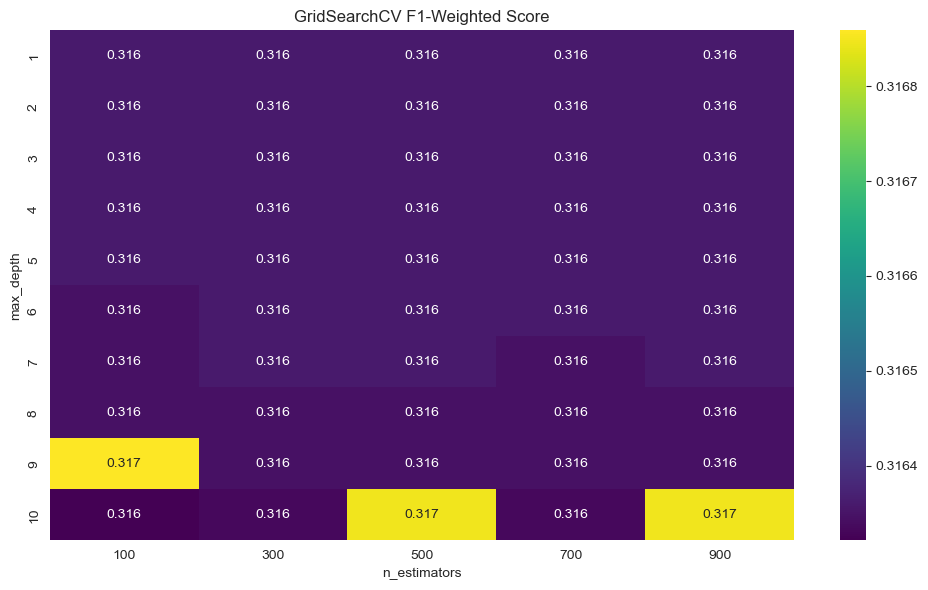

Best Parameters: {'max_depth': 9, 'n_estimators': 100}
Best Weighted F1 Score: 0.3168586776720751


In [21]:
# Get results into a DataFrame
results = pd.DataFrame(grid_cv.cv_results_)

# Extract relevant columns
scores_matrix = results.pivot(index='param_max_depth', 
                               columns='param_n_estimators', 
                               values='mean_test_score')

plt.figure(figsize=(10, 6))
sns.heatmap(scores_matrix, annot=True, fmt=".3f", cmap='viridis')
plt.title("GridSearchCV F1-Weighted Score")
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.tight_layout()
plt.show()
print("Best Parameters:", grid_cv.best_params_)
print("Best Weighted F1 Score:", grid_cv.best_score_)

In [22]:
feature_importance_df = pd.DataFrame({
    'Feature': features,  
    'Importance': grid_cv.best_estimator_.feature_importances_
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Reset index for better readability
feature_importance_df.reset_index(drop=True, inplace=True)

# Display the DataFrame
print(feature_importance_df)

                             Feature  Importance
0                           apt_dist    0.096044
1             BroadPhaseofFlight_Air    0.089744
2                    days_since_insp    0.084920
3                          longitude    0.080163
4                           latitude    0.078255
5                          altimeter    0.070684
6                     aircraft_count    0.058496
7         BroadPhaseofFlight_Landing    0.048074
8             fixed_retractable_RETR    0.031034
9             fixed_retractable_FIXD    0.028608
10                   light_cond_NDRK    0.027148
11                           num_eng    0.025120
12                          gust_kts    0.022499
13                   light_cond_DAYL    0.019508
14         BroadPhaseofFlight_Ground    0.014707
15                       eng_type_TP    0.014619
16           acft_make_other/unknown    0.014030
17                      eng_type_REC    0.012908
18                   light_cond_NITE    0.012544
19        BroadPhase

In [23]:
print('sum of Importances of features starting with ')
for string in ['acft_make', 'fixed', 'far', 'Broad', 'light', 'home', 'eng']:
    print(f'{string}:', feature_importance_df[feature_importance_df['Feature'].str.startswith(string)]['Importance'].sum())

sum of Importances of features starting with 
acft_make: 0.05152503251880545
fixed: 0.05964219691723099
far: 0.038709129913694115
Broad: 0.16889034874506753
light: 0.06685546134083896
home: 0.012123148488189815
eng: 0.045704938866969747


In [24]:
show_difference_between_two_df(df_train, df_val)

Only in the first dataframe: ['acft_make_boeing']
Only in the second dataframe: ['acft_make_air tractor inc']


In [25]:
df_val['acft_make_boeing'] = False

In [27]:
df_val = df_val[df_val['damage']!='UNK']
x_val = df_val[features] 
y_val = df_val['damage']
y_val_encoded = y_val.map(label_map)


### Parameter tuning : Random Forest

F1 Score (macro): 0.3643

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.04      0.08        25
           1       0.91      1.00      0.95      3376
           2       1.00      0.03      0.06       312

    accuracy                           0.91      3713
   macro avg       0.97      0.36      0.36      3713
weighted avg       0.92      0.91      0.87      3713



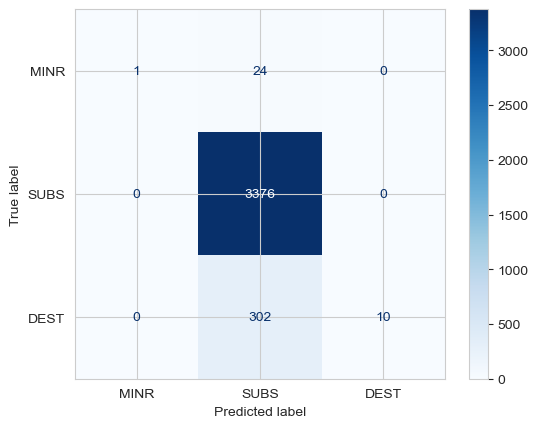

In [27]:

best_rf = grid_cv.best_estimator_

from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predict on validation set
y_pred = best_rf.predict(x_val)

# F1 Score (weighted)
f1 = f1_score(y_val_encoded, y_pred, average='macro')
print("F1 Score (macro):", round(f1, 4))

# Classification Report (includes precision, recall, f1 per class)
print("\nClassification Report:")
print(classification_report(y_val_encoded, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_val_encoded, y_pred)
inv_label_map = {v: k for k, v in label_map.items()}
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[inv_label_map[i] for i in range(len(inv_label_map))])
disp.plot(cmap='Blues')


In [24]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


# label_map = {'MINR':0, 'SUBS' :0, 'DEST' :1} # binary
# y_train_encoded = y_train.map(label_map)
grid_cv_rf = GridSearchCV(RandomForestClassifier(), 
                          param_grid = {
                                        'n_estimators': [100],
                                        'max_depth': [30],
                                        'min_samples_split': [5],
                                        'max_features': [None]
                                        }   ,
                          scoring = 'f1_macro', 
                          cv = 5)


grid_cv_rf.fit(X_train,y_train_encoded)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [30], 'max_features': [None],
                         'min_samples_split': [5], 'n_estimators': [100]},
             scoring='f1_macro')

In [41]:
print(grid_cv_rf.scorer_)

make_scorer(f1_score, response_method='predict', pos_label=None, average=macro)


 param_n_estimators  param_max_depth  param_min_samples_split param_max_features  mean_test_score
                100               30                        5               None         0.367297
Best Parameters: {'max_depth': 30, 'max_features': None, 'min_samples_split': 5, 'n_estimators': 100}
Best F1 Score: 0.36729704341708697
                  Feature  Importance
0               longitude    0.215266
1                latitude    0.210579
2         days_since_insp    0.190916
3                apt_dist    0.062790
4                gust_kts    0.032487
5  BroadPhaseofFlight_Air    0.030548
6          aircraft_count    0.019265
7                 num_eng    0.015676
8        acft_make_cessna    0.013239
9         acft_make_piper    0.012015
F1 Score (macro) on validation dataset: 0.8541

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.53      0.69        17
           1       0.98      1.00      0.99      2810
           2   

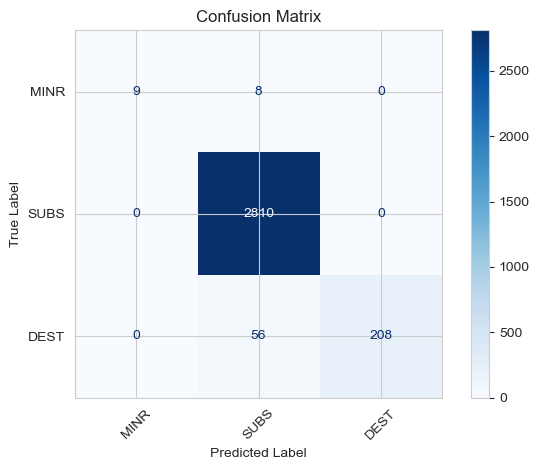

In [30]:

# Get results into a DataFrame
results = pd.DataFrame(grid_cv_rf.cv_results_)

top_n = results.sort_values(by='mean_test_score', ascending=False).head(10) # n = 10
print(top_n[[
    'param_n_estimators', 'param_max_depth', 'param_min_samples_split', 
    'param_max_features', 'mean_test_score'
]].to_string(index=False))
# print(top_n[[
#     'param_n_estimators', 'param_max_depth', 'param_min_samples_split', 
#     'param_max_features', 'mean_test_score'
# ]].to_markdown(index=False))

print("Best Parameters:", grid_cv_rf.best_params_)
print("Best F1 Score:", grid_cv_rf.best_score_)

feature_importance_df = pd.DataFrame({
    'Feature': features,  
    'Importance': grid_cv_rf.best_estimator_.feature_importances_
})

# Sort the features by importance in descending order

# Reset index for better readability
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)
feature_importance_df.reset_index(drop=True, inplace=True)
print(feature_importance_df.head(10))

# y_val_encoded = y_val.map(label_map)


best_rf = grid_cv_rf.best_estimator_

# Predict on validation set
y_pred = best_rf.predict(x_val)

# F1 Score (macro)
f1 = f1_score(y_val_encoded, y_pred, average='macro')
print("F1 Score (macro) on validation dataset:", round(f1, 4))

# Classification Report (includes precision, recall, f1 per class)
print("\nClassification Report:")
print(classification_report(y_val_encoded, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_val_encoded, y_pred)
labels_map = {v: k for k, v in label_map.items()}
labels = [labels_map[i] for i in sorted(labels_map)]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', xticks_rotation=45)

# Add title and adjust layout
disp.ax_.set_title("Confusion Matrix")
disp.ax_.set_xlabel("Predicted Label")
disp.ax_.set_ylabel("True Label")
disp.figure_.tight_layout()


### Parameter tuning : HistGradient Boosting

In [29]:
from sklearn.ensemble import HistGradientBoostingClassifier

histgrad = HistGradientBoostingClassifier()

param_grid_hist = {
    'learning_rate': [0.01, 0.05, 0.1, 0.5],
    'max_iter': [100, 200, 500],
    'max_leaf_nodes': [15, 31, 63],
    'min_samples_leaf': [20, 50, 100]
}

grid_hist = GridSearchCV(
    histgrad,
    param_grid_hist,
    scoring='f1_macro',
    cv=5,
)

grid_hist.fit(X_train,y_train_encoded)

GridSearchCV(cv=5, estimator=HistGradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5],
                         'max_iter': [100, 200, 500],
                         'max_leaf_nodes': [15, 31, 63],
                         'min_samples_leaf': [20, 50, 100]},
             scoring='f1_macro')

 param_learning_rate  param_max_iter  param_max_leaf_nodes  param_min_samples_leaf  mean_test_score
                 0.5             100                    31                     100         0.389328
                 0.5             100                    15                      20         0.388514
                 0.5             100                    15                      50         0.387363
                 0.5             100                    63                     100         0.385504
                 0.5             200                    15                      20         0.379726
                 0.5             500                    31                      20         0.379405
                 0.1             100                    63                      20         0.378660
                 0.1             200                    15                      20         0.378357
                 0.1             500                    63                      20         0.376981


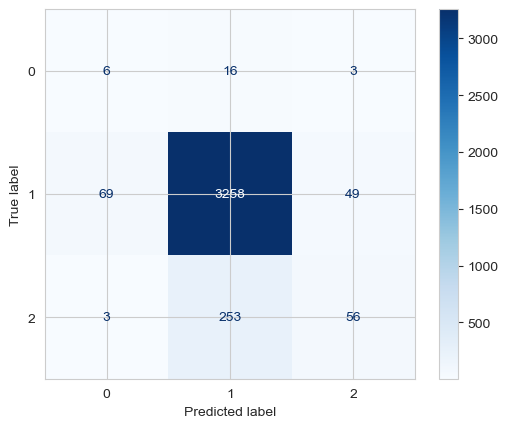

In [43]:

# Get results into a DataFrame
results = pd.DataFrame(grid_hist.cv_results_)

top_n = results.sort_values(by='mean_test_score', ascending=False).head(10) # n = 10
print(top_n[[
    'param_learning_rate', 'param_max_iter', 'param_max_leaf_nodes', 
    'param_min_samples_leaf', 'mean_test_score'
]].to_string(index=False))

print("Best Parameters:", grid_hist.best_params_)
print("Best macro F1 Score:", grid_hist.best_score_)

# y_val_encoded = y_val.map(label_map)


best_histgrad = grid_hist.best_estimator_

# Predict on validation set
y_pred = best_histgrad.predict(x_val)

# F1 Score (macro)
f1 = f1_score(y_val_encoded, y_pred, average='macro')
print("F1 Score (macro) on validation dataset:", round(f1, 4))

# Classification Report (includes precision, recall, f1 per class)
print("\nClassification Report:")
print(classification_report(y_val_encoded, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_val_encoded, y_pred)
# inv_label_map = {v: k for k, v in label_map.items()}
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

### Parameter tuning : XGboost classifier

In [31]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

param_grid_xgb = {
    'n_estimators': [20, 100, 200, 500, 1000],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

grid_xgb = GridSearchCV(
    xgb,
    param_grid_xgb,
    scoring='f1_macro',
    cv=5,
)

grid_xgb.fit(X_train,y_train_encoded)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 6, 10],
                         'n_estimators': [100, 200, 500],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='f1_macro')

In [47]:
print("y_val class distribution:")
print(y_val_encoded.value_counts(normalize=True))

print("Predicted class distribution:")
print(pd.Series(y_pred).value_counts(normalize=True))

y_val class distribution:
damage
1    0.909238
2    0.084029
0    0.006733
Name: proportion, dtype: float64
Predicted class distribution:
1    0.908968
2    0.084298
0    0.006733
Name: proportion, dtype: float64


 param_n_estimators  param_max_depth  param_learning_rate  param_subsample  param_colsample_bytree  mean_test_score
                500                6                  0.3              0.8                     1.0         0.394079
                500                3                  0.3              0.6                     1.0         0.393098
                500                3                  0.3              0.8                     1.0         0.389130
                500                6                  0.3              1.0                     1.0         0.388953
                200                3                  0.3              0.6                     1.0         0.388274
                500               10                  0.3              0.6                     0.8         0.387587
                500                3                  0.3              0.8                     0.8         0.387287
                500               10                  0.3              0

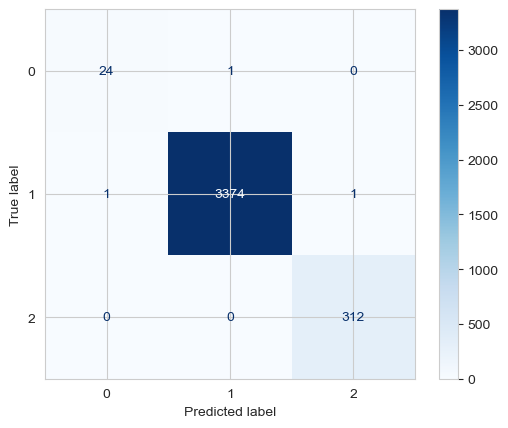

In [45]:

# Get results into a DataFrame
results = pd.DataFrame(grid_xgb.cv_results_)

top_n = results.sort_values(by='mean_test_score', ascending=False).head(10) # n = 10
print(top_n[[
    'param_n_estimators', 'param_max_depth', 'param_learning_rate', 
    'param_subsample', 'param_colsample_bytree','mean_test_score'
]].to_string(index=False))

print("Best Parameters:", grid_xgb.best_params_)
print("Best macro F1 Score on validation dataset:", grid_xgb.best_score_)

feature_importance_df = pd.DataFrame({
    'Feature': features,  
    'Importance': grid_xgb.best_estimator_.feature_importances_
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Reset index for better readability
feature_importance_df.reset_index(drop=True, inplace=True)
print(feature_importance_df.head(10))

# y_val_encoded = y_val.map(label_map)


best_xgb = grid_xgb.best_estimator_

# Predict on validation set
y_pred = best_xgb.predict(x_val)

# F1 Score (macro)
f1 = f1_score(y_val_encoded, y_pred, average='macro')
print("F1 Score (macro) on validation dataset:", round(f1, 4))

# Classification Report (includes precision, recall, f1 per class)
print("\nClassification Report:")
print(classification_report(y_val_encoded, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_val_encoded, y_pred)
# inv_label_map = {v: k for k, v in label_map.items()}
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

In [48]:
grid_xgb.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.3,
 'max_depth': 6,
 'n_estimators': 500,
 'subsample': 0.8}

### Parameter tuning: Extra Trees Classifier

In [32]:
from sklearn.ensemble import ExtraTreesClassifier
extratrees = ExtraTreesClassifier()
param_grid_extra = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'max_features': ['sqrt', 'log2', None]
}



grid_extra = GridSearchCV(
    extratrees,
    param_grid_extra,
    scoring='f1_macro',
    cv=5,
)

grid_extra.fit(X_train,y_train_encoded)


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'max_depth': [None, 5, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': [100, 200, 500]},
             scoring='f1_macro')

 param_n_estimators param_max_depth  param_min_samples_split param_max_features  mean_test_score
                100            None                        5               None         0.416742
                100            None                        2               None         0.416035
                200              30                        2               None         0.414865
                500            None                        5               None         0.414540
                100              30                        2               None         0.413870
                200            None                        2               None         0.412313
                200            None                        5               None         0.412217
                500              20                        2               None         0.411499
                100              20                        2               None         0.410572
                500           

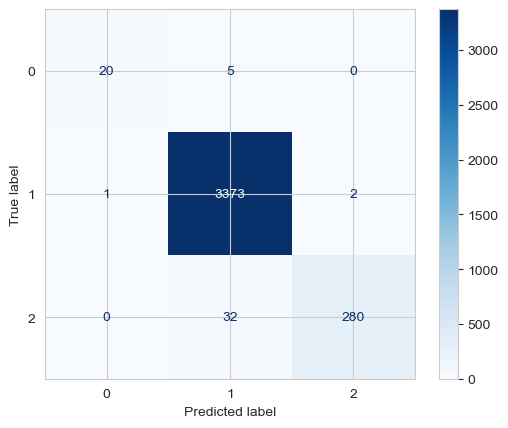

In [39]:

# Get results into a DataFrame
results = pd.DataFrame(grid_extra.cv_results_)

top_n = results.sort_values(by='mean_test_score', ascending=False).head(10) # n = 10
print(top_n[[
    'param_n_estimators', 'param_max_depth', 'param_min_samples_split', 
    'param_max_features', 'mean_test_score'
]].to_string(index=False))

print("Best Parameters:", grid_extra.best_params_)
print("Best Weighted F1 Score:", grid_extra.best_score_)

feature_importance_df = pd.DataFrame({
    'Feature': features,  
    'Importance': grid_extra.best_estimator_.feature_importances_
})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Reset index for better readability
feature_importance_df.reset_index(drop=True, inplace=True)
print(feature_importance_df.head(10))

# y_val_encoded = y_val.map(label_map)


best_extra_tree = grid_extra.best_estimator_

# Predict on validation set
y_pred = best_extra_tree.predict(x_val)

# F1 Score (macro)
f1 = f1_score(y_val_encoded, y_pred, average='macro')
print("F1 Score (macro):", round(f1, 4))

# Classification Report (includes precision, recall, f1 per class)
print("\nClassification Report:")
print(classification_report(y_val_encoded, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_val_encoded, y_pred)
# inv_label_map = {v: k for k, v in label_map.items()}
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

### Chosen model : XGboost


In [51]:
xgb_best = XGBClassifier(n_estimators = 500, max_depth = 6, learning_rate = 0.3, subsample = 0.8, colsample_bytree = 1.0)
xgb_best.fit(X_train,y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [89]:
df_test = pd.read_csv('../data/ntsb_processed/ntsb_test_cleaned.csv')
# df_post_covid = pd.read_csv('../data/ntsb_processed/master_post_covid.csv')

In [90]:
# change latitude and longitude to numeric value


df = df_test.copy()  

for col in ['latitude', 'longitude']:
    df[col] = df[col].replace('other/unknown', np.nan)

df.dropna(subset=['latitude', 'longitude'], inplace=True)

df['latitude'] = df['latitude'].str[:-1].astype(int)
df['longitude'] = df['longitude'].str[:-1].astype(int)

df_test = df

In [91]:

show_difference_between_two_df(df_train,df_test)
df_test['far_part_PUBU'] = False

Only in the first dataframe: ['far_part_PUBU']
Only in the second dataframe: ['acft_category_WSFT', 'acft_make_air tractor inc']


In [92]:

df_test = df_test[df_test['damage']!='UNK']
X_test = df_test[features] 
y_test = df_test['damage']
y_test_encoded = y_test.map(label_map)

In [102]:
y_pred = xgb_best.predict(x_val)
y_pred_proba = xgb_best.predict_proba(x_val)

In [103]:
from sklearn.metrics import accuracy_score
# Accuracy
print("Accuracy:", accuracy_score(y_val_encoded, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_val_encoded, y_pred))

# Classification Report (includes precision, recall, f1-score)
print("Classification Report:\n", classification_report(y_val_encoded, y_pred))


Accuracy: 0.9991920280096956
Confusion Matrix:
 [[  24    1    0]
 [   1 3374    1]
 [   0    0  312]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        25
           1       1.00      1.00      1.00      3376
           2       1.00      1.00      1.00       312

    accuracy                           1.00      3713
   macro avg       0.99      0.99      0.99      3713
weighted avg       1.00      1.00      1.00      3713



In [114]:
y_pred = xgb_best.predict(X_test)
y_pred_proba = xgb_best.predict_proba(X_test)
# Accuracy
print("Accuracy:", accuracy_score(y_test_encoded, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred))

# Classification Report (includes precision, recall, f1-score)
print("Classification Report:\n", classification_report(y_test_encoded, y_pred))


Accuracy: 0.8910307898259705
Confusion Matrix:
 [[   1   29    0]
 [   2 3302   66]
 [   1  309   25]]
Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.03      0.06        30
           1       0.91      0.98      0.94      3370
           2       0.27      0.07      0.12       335

    accuracy                           0.89      3735
   macro avg       0.48      0.36      0.37      3735
weighted avg       0.85      0.89      0.86      3735



### Chosen model: Extra trees classifier


In [106]:
best_extra_tree_classifier = ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=5, max_features=None)
best_extra_tree_classifier.fit(X_train,y_train_encoded)

ExtraTreesClassifier(max_features=None, min_samples_split=5)

In [109]:
y_pred = best_extra_tree_classifier.predict(x_val)
y_pred_proba = best_extra_tree_classifier.predict_proba(x_val)
# Accuracy
print("Accuracy:", accuracy_score(y_val_encoded, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_val_encoded, y_pred))

# Classification Report (includes precision, recall, f1-score)
print("Classification Report:\n", classification_report(y_val_encoded, y_pred))


Accuracy: 0.988149744142203
Confusion Matrix:
 [[  20    5    0]
 [   1 3374    1]
 [   0   37  275]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.80      0.87        25
           1       0.99      1.00      0.99      3376
           2       1.00      0.88      0.94       312

    accuracy                           0.99      3713
   macro avg       0.98      0.89      0.93      3713
weighted avg       0.99      0.99      0.99      3713



In [110]:
y_pred = best_extra_tree_classifier.predict(X_test)
y_pred_proba = best_extra_tree_classifier.predict_proba(X_test)
# Accuracy
print("Accuracy:", accuracy_score(y_test_encoded, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred))

# Classification Report (includes precision, recall, f1-score)
print("Classification Report:\n", classification_report(y_test_encoded, y_pred))


Accuracy: 0.8899598393574297
Confusion Matrix:
 [[   6   24    0]
 [  13 3289   68]
 [   1  305   29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.20      0.24        30
           1       0.91      0.98      0.94      3370
           2       0.30      0.09      0.13       335

    accuracy                           0.89      3735
   macro avg       0.50      0.42      0.44      3735
weighted avg       0.85      0.89      0.86      3735



In [112]:
y_dumb = np.zeros(len(y_test_encoded))
y_dumb = y_dumb + 1

In [113]:
# y_pred = best_extra_tree_classifier.predict(X_test)
# y_pred_proba = best_extra_tree_classifier.predict_proba(X_test)
# Accuracy
print("Accuracy:", accuracy_score(y_test_encoded, y_dumb))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test_encoded, y_dumb))

# Classification Report (includes precision, recall, f1-score)
print("Classification Report:\n", classification_report(y_test_encoded, y_dumb))


Accuracy: 0.9022757697456493
Confusion Matrix:
 [[   0   30    0]
 [   0 3370    0]
 [   0  335    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.90      1.00      0.95      3370
           2       0.00      0.00      0.00       335

    accuracy                           0.90      3735
   macro avg       0.30      0.33      0.32      3735
weighted avg       0.81      0.90      0.86      3735



/Users/inkeejung/anaconda3/envs/erdos_summer_2025/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/inkeejung/anaconda3/envs/erdos_summer_2025/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/inkeejung/anaconda3/envs/erdos_summer_2025/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

### acft_prop_inj -> target

In [128]:
target = ['acft_prop_inj_n', 'acft_prop_inj_m', 'acft_prop_inj_s','acft_prop_inj_f']
df_train[target].head(20)

,acft_prop_inj_n,acft_prop_inj_m,acft_prop_inj_s,acft_prop_inj_f
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0
6,0.0,1.0,0.0,0.0
7,0.0,0.1,0.3,0.6
8,1.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0
10,1.0,0.0,0.0,0.0


In [139]:
df_train = pd.read_csv('../data/ntsb_processed/ntsb_train_cleaned.csv')
df_train = df_train[~df_train['acft_prop_inj_f'].isna()]

# change latitude and longitude to numeric value


df = df_train.copy()  

for col in ['latitude', 'longitude']:
    df[col] = df[col].replace('other/unknown', np.nan)

df.dropna(subset=['latitude', 'longitude'], inplace=True)

df['latitude'] = df['latitude'].str[:-1].astype(int)
df['longitude'] = df['longitude'].str[:-1].astype(int)

df_train = df
df_train = df_train[df_train['gust_kts']<800]

X_train = df_train[features]
y_train = df_train[target]

In [143]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor

reg = MultiOutputRegressor(RandomForestRegressor(n_estimators=100))



reg.fit(X_train, y_train)

# It's doing regression in each target and then combines prediction when it makes prediction;
'''
reg_1 = RandomForestRegressor().fit(X_train, y_train[:, 0])
reg_2 = RandomForestRegressor().fit(X_train, y_train[:, 1])
reg_3 = ...
reg_4 = ...

y_pred[:, 0] = reg_1.predict(X_test)
y_pred[:, 1] = reg_2.predict(X_test) 
...


'''

MultiOutputRegressor(estimator=RandomForestRegressor())

In [147]:
df_val = pd.read_csv('../data/ntsb_processed/ntsb_val_cleaned.csv')
show_difference_between_two_df(df_train, df_val)
df_val['acft_make_boeing'] = False
df_val = df_val[~df_val['acft_prop_inj_f'].isna()]

# change latitude and longitude to numeric value


df = df_val.copy()  

for col in ['latitude', 'longitude']:
    df[col] = df[col].replace('other/unknown', np.nan)

df.dropna(subset=['latitude', 'longitude'], inplace=True)

df['latitude'] = df['latitude'].str[:-1].astype(int)
df['longitude'] = df['longitude'].str[:-1].astype(int)

df_val = df
df_val = df_val[df_val['gust_kts']<800]

X_val = df_val[features]
y_val = df_val[target]

Only in the first dataframe: ['acft_make_boeing']
Only in the second dataframe: ['acft_make_air tractor inc']


In [148]:
# Normalize predictions to sum to 1
y_pred_raw = reg.predict(X_val)
y_pred = y_pred_raw / y_pred_raw.sum(axis=1, keepdims=True)


In [183]:
y_pred_raw

array([[0.79555556, 0.08      , 0.015     , 0.015     ],
       [0.16666667, 0.005     , 0.035     , 0.815     ],
       [0.91      , 0.03      , 0.075     , 0.02      ],
       ...,
       [0.97      , 0.04      , 0.        , 0.        ],
       [0.95      , 0.05      , 0.01      , 0.04      ],
       [0.905     , 0.0425    , 0.05166667, 0.09      ]], shape=(3875, 4))

In [165]:
y_val

,acft_prop_inj_n,acft_prop_inj_m,acft_prop_inj_s,acft_prop_inj_f
0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0
4,0.8,0.2,0.0,0.0
...,...,...,...,...
3880,0.0,0.0,1.0,0.0
3881,0.0,0.0,0.0,1.0
3882,1.0,0.0,0.0,0.0
3883,1.0,0.0,0.0,0.0


In [170]:
y_dumb =  np.zeros((len(y_val), 4))
y_dumb[:]= np.mean(y_val.values, axis=0)

In [171]:
y_dumb

array([[0.58783617, 0.15634802, 0.10391171, 0.15190409],
       [0.58783617, 0.15634802, 0.10391171, 0.15190409],
       [0.58783617, 0.15634802, 0.10391171, 0.15190409],
       ...,
       [0.58783617, 0.15634802, 0.10391171, 0.15190409],
       [0.58783617, 0.15634802, 0.10391171, 0.15190409],
       [0.58783617, 0.15634802, 0.10391171, 0.15190409]], shape=(3875, 4))

In [172]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
# y_dumb = np.zeros((len(y_val), 4))
# y_dumb[:, 0] = 1
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print('Dumb MSE and MAE:', (mean_squared_error(y_val, y_dumb), mean_absolute_error(y_val, y_dumb)))


MSE: 0.0190
MAE: 0.0988
Dumb MSE and MAE: (0.13725200155012218, 0.2880710954795539)


In [173]:
y_dumb = np.zeros((len(y_val), 4))
y_dumb[:, 0] = 1
print('Dumb MSE and MAE:', (mean_squared_error(y_val, y_dumb), mean_absolute_error(y_val, y_dumb)))

Dumb MSE and MAE: (0.19430105789406704, 0.20608191518756352)


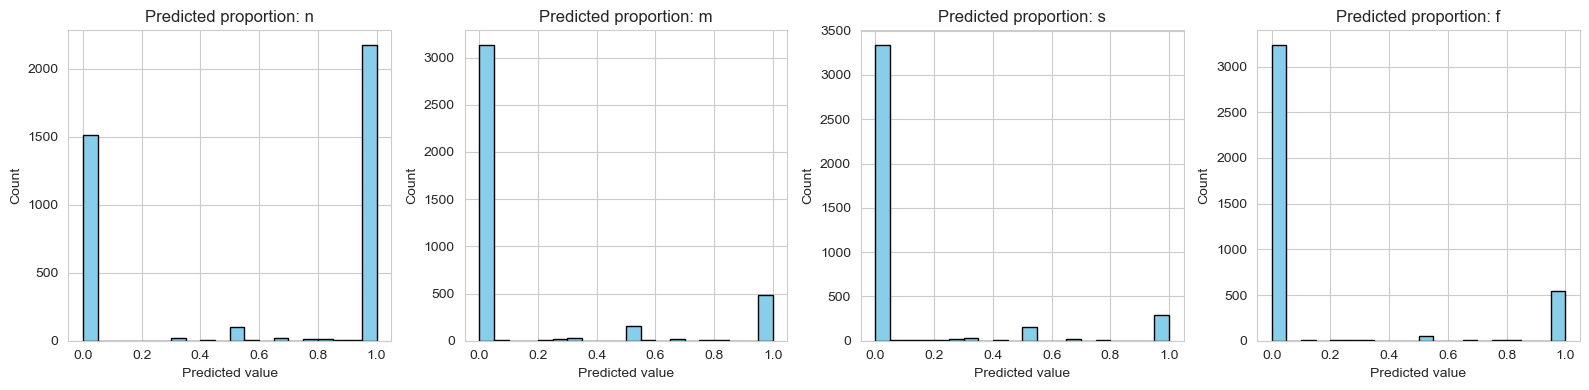

In [160]:
labels = ['n', 'm', 's', 'f']  # or however you label the 4 outputs
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
y_val_np = y_val.values 
for i in range(4):
    axes[i].hist(y_val_np[:, i], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f"Predicted proportion: {labels[i]}")
    axes[i].set_xlabel("Predicted value")
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

In [184]:
df_test = pd.read_csv('../data/ntsb_processed/ntsb_test_cleaned.csv')
df = df_test.copy()  

for col in ['latitude', 'longitude']:
    df[col] = df[col].replace('other/unknown', np.nan)

df.dropna(subset=['latitude', 'longitude'], inplace=True)

df['latitude'] = df['latitude'].str[:-1].astype(int)
df['longitude'] = df['longitude'].str[:-1].astype(int)

df_test = df
df_test = df_test[~df_test['acft_prop_inj_f'].isna()]

df_test['far_part_PUBU'] = False

X_test = df_test[features] 
y_test = df_test[target]

y_pred_raw = reg.predict(X_test)
y_pred = y_pred_raw / y_pred_raw.sum(axis=1, keepdims=True)


/var/folders/gt/llhq12_57w5fdzbm5g__rpj00000gn/T/ipykernel_10630/301079359.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['far_part_PUBU'] = False


In [185]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")

MSE: 0.1243
MAE: 0.2550


In [192]:
per_class_mae = np.mean(np.abs(y_test - y_pred), axis=0)
print("Per-class MAE:\n", per_class_mae)

Per-class MAE:
 acft_prop_inj_n    0.384988
acft_prop_inj_m    0.245805
acft_prop_inj_s    0.170309
acft_prop_inj_f    0.219086
dtype: float64


In [191]:
y_dumb =  np.zeros((len(y_test), 4))
y_dumb[:]= np.mean(y_val.values, axis=0)
per_class_mae = np.mean(np.abs(y_test - y_dumb), axis=0)
print("Per-class MAE:\n", per_class_mae)

Per-class MAE:
 acft_prop_inj_n    0.467169
acft_prop_inj_m    0.248271
acft_prop_inj_s    0.177025
acft_prop_inj_f    0.259931
dtype: float64


In [193]:
def per_class_mae_scorer(y_true, y_pred):
    errors = np.mean(np.abs(y_true - y_pred), axis=0)  # shape (4,)
    return -np.mean(errors)
from sklearn.metrics import make_scorer
scorer = make_scorer(per_class_mae_scorer, greater_is_better=True)

In [194]:

param_grid = {
    'estimator__n_estimators': [20, 50, 100, 200, 500],
    'estimator__max_depth': [None, 5, 10, 20],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 5, 10],
    'estimator__max_features': ['sqrt', 'log2', None]
}
reg_rf = MultiOutputRegressor(RandomForestRegressor(random_state=42))

grid = GridSearchCV(
    reg_rf,
    param_grid,
    scoring=scorer,
    cv=5,
    verbose=2,
    n_jobs=-1
)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
[CV] END estimator__max_depth=None, estimator__max_features=sqrt, estimator__min_samples_leaf=1, estimator__min_samples_split=2, estimator__n_estimators=20; total time=   1.6s
[CV] END estimator__max_depth=None, estimator__max_features=sqrt, estimator__min_samples_leaf=1, estimator__min_samples_split=2, estimator__n_estimators=20; total time=   1.8s
[CV] END estimator__max_depth=None, estimator__max_features=sqrt, estimator__min_samples_leaf=1, estimator__min_samples_split=2, estimator__n_estimators=20; total time=   1.8s
[CV] END estimator__max_depth=None, estimator__max_features=sqrt, estimator__min_samples_leaf=1, estimator__min_samples_split=2, estimator__n_estimators=20; total time=   1.8s
[CV] END estimator__max_depth=None, estimator__max_features=sqrt, estimator__min_samples_leaf=1, estimator__min_samples_split=2, estimator__n_estimators=20; total time=   2.0s
[CV] END estimator__max_depth=None, estimator__max_featu

/Users/inkeejung/anaconda3/envs/erdos_summer_2025/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END estimator__max_depth=None, estimator__max_features=sqrt, estimator__min_samples_leaf=1, estimator__min_samples_split=2, estimator__n_estimators=500; total time=  44.3s
[CV] END estimator__max_depth=None, estimator__max_features=sqrt, estimator__min_samples_leaf=1, estimator__min_samples_split=5, estimator__n_estimators=200; total time=  15.7s
[CV] END estimator__max_depth=None, estimator__max_features=sqrt, estimator__min_samples_leaf=1, estimator__min_samples_split=2, estimator__n_estimators=500; total time=  43.3s
[CV] END estimator__max_depth=None, estimator__max_features=sqrt, estimator__min_samples_leaf=1, estimator__min_samples_split=5, estimator__n_estimators=200; total time=  15.9s
[CV] END estimator__max_depth=None, estimator__max_features=sqrt, estimator__min_samples_leaf=1, estimator__min_samples_split=2, estimator__n_estimators=500; total time=  42.6s
[CV] END estimator__max_depth=None, estimator__max_features=sqrt, estimator__min_samples_leaf=1, estimator__min_sam

GridSearchCV(cv=5,
             estimator=MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42)),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [None, 5, 10, 20],
                         'estimator__max_features': ['sqrt', 'log2', None],
                         'estimator__min_samples_leaf': [1, 2, 5, 10],
                         'estimator__min_samples_split': [2, 5, 10],
                         'estimator__n_estimators': [20, 50, 100, 200, 500]},
             scoring=make_scorer(per_class_mae_scorer, response_method='predict'),
             verbose=2)

In [200]:

# Get results into a DataFrame
results = pd.DataFrame(grid.cv_results_)

top_n = results.sort_values(by='mean_test_score', ascending=False).head(10) # n = 10
print(top_n[[
    'param_estimator__n_estimators', 'param_estimator__max_depth', 'param_estimator__min_samples_split', 
    'param_estimator__min_samples_leaf', 'param_estimator__max_features','mean_test_score'
]].to_string(index=False))

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)



 param_estimator__n_estimators param_estimator__max_depth  param_estimator__min_samples_split  param_estimator__min_samples_leaf param_estimator__max_features  mean_test_score
                           100                         10                                   2                                  2                          None        -0.253697
                           100                         10                                   5                                  2                          None        -0.253726
                           200                         10                                   2                                  1                          None        -0.253751
                           100                         10                                   2                                  1                          None        -0.253756
                           200                         10                                   2                           

In [203]:
best_random_forest_regressor = grid.best_estimator_

y_pred_raw = best_random_forest_regressor.predict(X_test)
y_pred = y_pred_raw / y_pred_raw.sum(axis=1, keepdims=True)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print('Dumb MAE:', mean_absolute_error(y_test, y_dumb))
per_class_mae = np.mean(np.abs(y_test - y_pred), axis=0)
print("Per-class MAE:\n", per_class_mae)
per_class_mae = np.mean(np.abs(y_test - y_dumb), axis=0)
print("Per-class (dumb) MAE:\n", per_class_mae)

MSE: 0.1200
MAE: 0.2524
Dumb MAE: 0.2880990698075292
Per-class MAE:
 acft_prop_inj_n    0.384703
acft_prop_inj_m    0.240338
acft_prop_inj_s    0.166397
acft_prop_inj_f    0.218218
dtype: float64
Per-class (dumb) MAE:
 acft_prop_inj_n    0.467169
acft_prop_inj_m    0.248271
acft_prop_inj_s    0.177025
acft_prop_inj_f    0.259931
dtype: float64


Top n(n=15) feature importances for output 0:
                        Feature  Importance
0                      apt_dist    0.117138
1    BroadPhaseofFlight_Landing    0.107184
2               days_since_insp    0.094354
3        BroadPhaseofFlight_Air    0.092676
4                     longitude    0.089468
5                      latitude    0.089299
6                     altimeter    0.067962
7     BroadPhaseofFlight_Ground    0.067324
8    BroadPhaseofFlight_Takeoff    0.050436
9                   homebuilt_N    0.034069
10                 far_part_121    0.020507
11  acft_category_other/unknown    0.019427
12                     gust_kts    0.014573
13           acft_category_HELI    0.012119
14            acft_category_AIR    0.010280
Top n(n=15) feature importances for output 1:
                       Feature  Importance
0                     latitude    0.180401
1                    longitude    0.177669
2              days_since_insp    0.176908
3                    altimeter  

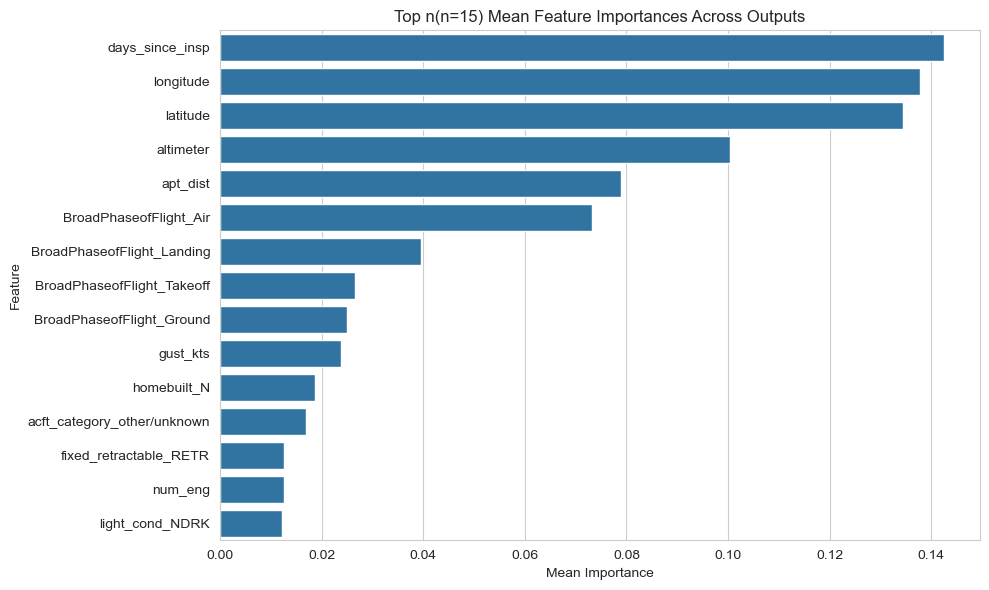

In [215]:
# Access feature importances for each target
n = 15
for i, estimator in enumerate(best_random_forest_regressor.estimators_):
    feature_importance_df = pd.DataFrame({
        'Feature': features,
        'Importance': estimator.feature_importances_
    }).sort_values(by="Importance", ascending=False).reset_index(drop=True)
    
    print(f"Top n(n={n}) feature importances for output {i}:")
    print(feature_importance_df.head(n))
    
    
all_importances = np.array([est.feature_importances_ for est in best_random_forest_regressor.estimators_])
mean_importance = np.mean(all_importances, axis=0)

# Create a DataFrame with feature names
mean_importance_df = pd.DataFrame({
    'Feature': features,
    'Mean Importance': mean_importance
}).sort_values(by='Mean Importance', ascending=False).reset_index(drop=True)

print(f"Top n(n={n}) Mean feature importances across all outputs:")
print(mean_importance_df.head(n))

plt.figure(figsize=(10, 6))
sns.barplot(x="Mean Importance", y="Feature", data=mean_importance_df.head(n))
plt.title(f"Top n(n={n}) Mean Feature Importances Across Outputs")

plt.tight_layout()
plt.show()